In [1]:
# https://www.kaggle.com/datasets/yasserh/walmart-dataset

In [2]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [3]:
wallmart=pd.read_csv('Walmart.csv')

In [4]:
wallmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
wallmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
wallmart.drop(['Date', 'Store', 'Holiday_Flag'], axis=1, inplace=True)

In [7]:
wallmart.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106


In [8]:
wallmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  6435 non-null   float64
 1   Temperature   6435 non-null   float64
 2   Fuel_Price    6435 non-null   float64
 3   CPI           6435 non-null   float64
 4   Unemployment  6435 non-null   float64
dtypes: float64(5)
memory usage: 251.5 KB


In [9]:
wallmart[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684
6431,733455.07,64.89,3.985,192.170412,8.667
6432,734464.36,54.47,4.000,192.327265,8.667
6433,718125.53,56.47,3.969,192.330854,8.667


In [10]:
X_data=wallmart[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']]

In [11]:
y_data=wallmart['CPI']

In [12]:
X_data=np.array(X_data)
y_data=np.array(y_data)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

In [15]:
X_data_scaled

array([[0.39729115, 0.43414873, 0.0501002 , 0.40511788],
       [0.39681079, 0.39696673, 0.03807615, 0.40511788],
       [0.38850052, 0.41086106, 0.02104208, 0.40511788],
       ...,
       [0.14533712, 0.55313112, 0.76553106, 0.45888442],
       [0.1408095 , 0.57270059, 0.75      , 0.45888442],
       [0.15249124, 0.59598826, 0.70641283, 0.45888442]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5791, 4) (5791,)
(644, 4) (644,)


In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# 레이어를 순서대로 쌓을 수 있도록 객체를 생성
model=Sequential()
model.add(Dense(2048, activation='relu', input_dim=4))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear')) # 회귀일 때, 마지막 출력층의 활성화 함수

In [19]:
# 쌓은 것으로 모델 세팅
model.compile(optimizer='adam', loss='mse', metrics=['mae']) 

In [20]:
# 모델에 세팅한 내용을 요약해서 프린트
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              10240     
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [21]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
181/181 - 3s - loss: 11756381.0000 - mae: 1136.0703 - 3s/epoch - 16ms/step
Epoch 2/100
181/181 - 3s - loss: 2027752.8750 - mae: 755.3691 - 3s/epoch - 14ms/step
Epoch 3/100
181/181 - 3s - loss: 118969.7656 - mae: 159.5739 - 3s/epoch - 14ms/step
Epoch 4/100
181/181 - 3s - loss: 13489.5586 - mae: 95.4296 - 3s/epoch - 14ms/step
Epoch 5/100
181/181 - 3s - loss: 15777.1602 - mae: 103.1240 - 3s/epoch - 14ms/step
Epoch 6/100
181/181 - 2s - loss: 21203.2988 - mae: 118.0350 - 2s/epoch - 14ms/step
Epoch 7/100
181/181 - 3s - loss: 17236.3008 - mae: 105.0632 - 3s/epoch - 14ms/step
Epoch 8/100
181/181 - 2s - loss: 23437.2402 - mae: 123.0984 - 2s/epoch - 14ms/step
Epoch 9/100
181/181 - 2s - loss: 16391.7188 - mae: 105.3328 - 2s/epoch - 14ms/step
Epoch 10/100
181/181 - 2s - loss: 31283.2207 - mae: 139.7418 - 2s/epoch - 14ms/step
Epoch 11/100
181/181 - 3s - loss: 13646.9863 - mae: 95.7979 - 3s/epoch - 14ms/step
Epoch 12/100
181/181 - 3s - loss: 2012457.1250 - mae: 729.1672 - 3s/epoch - 14ms

In [22]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 4ms/step - loss: 6655.9595 - mae: 66.2766


[6655.95947265625, 66.27662658691406]

In [23]:
predict_test=model.predict(X_test)
predict_test[:5]

array([[208.51765 ],
       [ 59.364323],
       [145.48698 ],
       [ 59.659508],
       [118.822685]], dtype=float32)

In [24]:
y_test[:5] #실제 값, 위는 예측 값

array([142.9376167, 129.8268333, 216.6310383, 131.1930968, 138.0638929])

In [25]:
from sklearn.metrics import r2_score

In [26]:
R2=r2_score(y_test, predict_test)

In [27]:
R2

-3.2360539420015506

In [28]:
from matplotlib import pyplot as plt

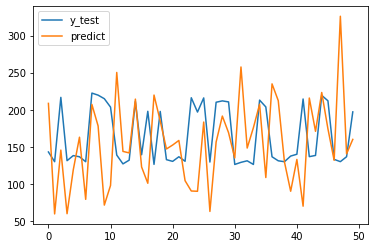

In [29]:
plt.plot(y_test[:50])
plt.plot(predict_test[:50])
# 화면에 그래프를 보여줍니다
plt.legend(['y_test', 'predict'])
plt.show()